# THE SPARKS FOUNDATION


# Data Science & Business Analytics Internship - JAN2021


# By - SAYANTAN BHATTACHARYYA


#  TASK 1- Prediction Using Supervised Machine Learning


Query - What will be predicted score if a student studies for 9.25 hrs/ day?
Now we will do analysis by given data set  

# 1. Data Transformation

In [11]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
#Read the data 
data = pd.read_csv("http://bit.ly/w-data")
print (data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [59]:
# Checking the data shape

print(data.shape)

(25, 2)


In [60]:
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [61]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [62]:
#Checking for missing values
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


this implies that in the given dataset there is no missing values. Therefore data cleaning is not required.



# 2. Data Visualization

Now we will do scatter plot on the given dataset


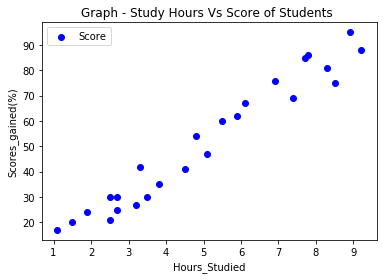

In [63]:
#Scatter plot of Hours vs Score
plt.scatter(data.Hours,data.Scores,label='Score',color='blue')
plt.title("Graph - Study Hours Vs Score of Students ")
plt.xlabel("Hours_Studied")
plt.ylabel("Scores_gained(%)")
plt.legend()
plt.show()

from the above graph we can conclude that "Study Hours" and "student Score" have a " positive linear relationship " is there.
So we can fit " linear regression model " to analyse the dataset to reach a proper conclusion of given " Query - What will be predicted score if a student studies for 9.25 hrs/ day? "

# 3. Fit Linear Regressiom Model

Divide the dataset into Input and Output

In [64]:
x = data[['Hours']]
y = data['Scores']

Now, we split our Dataset into Train and Test Data. We will use Train Dataset to build the Model and Test Dataset to predict Dataset using the Model.

In [65]:
#Here we are split dataset into 80-20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

So, we have 80% of the dataset as Train dataset and rest is as Test dataset

In [66]:
Model = LinearRegression()
Model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# the value of Intercept and Coefficient
print("Intercept :", Model.intercept_)
print("Coefficient of the Independent Variable :", Model.coef_)

Intercept : 2.8102364628265804
Coefficient of the Independent Variable : [9.59563563]


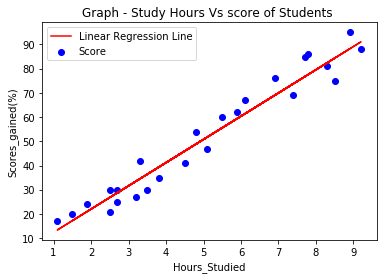

In [68]:
# Fit Regression Line
line = Model.intercept_ + Model.coef_*x

#Visualize Regression Line
plt.scatter(data.Hours,data.Scores,label='Score',color='blue')
plt.title("Graph - Study Hours Vs score of Students ")
plt.xlabel("Hours_Studied")
plt.ylabel("Scores_gained(%)")
plt.plot(x,line, color = "red", label = "Linear Regression Line")
plt.legend()
plt.show()

# 4. Prediction Using Our Model

In [69]:
#Predicted Value of the Test dataset of X variable
y_pred = Model.predict(x_test)

In [75]:
#Creating dataframe for comparing observed vs Predicted Value

df = pd.DataFrame({"observed":y_test,"Predicted": y_pred})
df

,observed,Predicted
15,95,88.211394
20,30,28.718453
23,76,69.020122
22,35,39.273652
14,17,13.365436


In [76]:
#Calculating Model Accuracy
print("Training Score :", Model.score(x_train, y_train))
print("Testing Score :", Model.score(x_test, y_test))

Training Score : 0.9444169959416537
Testing Score : 0.9710141413299419


# 5. Predict Our Query

In [77]:
query = 9.25
new_pred= Model.predict([[query]])
print("No. of Hours Studied :", query)
print("Predicted Score :",new_pred[0])

No. of Hours Studied : 9.25
Predicted Score : 91.56986604454477


# 6. Checking Error and Accuracy

In [78]:
#Checking Absolute Error
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_pred))
print("R-2 Score :", metrics.r2_score(y_test, y_pred))

Mean Absolute Error : 4.5916495300630285
Mean Squared Error : 25.58407829653998
R-2 Score : 0.971014141329942


In [79]:
print("""Comment - Our Model is giving 97.10% accurate results which is very good.
we can predict from the given dataset If a student studies for 9.25 hours per day,the student is expected to score 91.56% (approx)""")

Comment - Our Model is giving 97.10% accurate results which is very good.
we can predict from the given dataset If a student studies for 9.25 hours per day,the student is expected to score 91.56% (approx)
